# Importing Modules 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import re
import string
import nltk
import warnings
from wordcloud import WordCloud
%matplotlib inline
warnings.filterwarnings('ignore')

# Load the Datasets

In [2]:
df = pd.read_csv('Trumps Legcy.csv')

In [3]:
df.head()

,id,text,device,favorites,retweets,date
0,98455000000000000,Republicans and Democrats have both created ou...,TweetDeck,49,255,8/2/2011 18:07
1,1234650000000000000,I was thrilled to be back in the Great city of...,Twitter for iPhone,73748,17404,3/3/2020 1:34
2,1218010000000000000,RT @CBS_Herridge: READ: Letter to surveillance...,Twitter for iPhone,0,7396,1/17/2020 3:22
3,1304880000000000000,The Unsolicited Mail In Ballot Scam is a major...,Twitter for iPhone,80527,23502,9/12/2020 20:10
4,1218160000000000000,RT @MZHemingway: Very friendly telling of even...,Twitter for iPhone,0,9081,1/17/2020 13:13


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56571 entries, 0 to 56570
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         56571 non-null  int64 
 1   text       56571 non-null  object
 2   device     56571 non-null  object
 3   favorites  56571 non-null  int64 
 4   retweets   56571 non-null  int64 
 5   date       56571 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.6+ MB


# Preprocessing the datasets

In [5]:
# remove pattern in the input text.
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt    

In [6]:
# remove twitter handles @.
df['clean_text'] = np.vectorize(remove_pattern)(df['text'], "@[\w]*")

In [7]:
# remove special characters, numbers and punctuations.
df['clean_text'] = df['clean_text'].str.replace("[^a-zA-Z#]", " ")

In [8]:
# Create a function to clean the tweets.
def cleanTxt(text):
    text = re.sub(r'https?\/\/\S+','', text) # remove link like https
    return text

In [9]:
df['clean_text'] = df['clean_text'].apply(cleanTxt)

In [10]:
# remove short words.
df['clean_text'] = df['clean_text'].apply(lambda x: " ".join([w for w in x.split() if len (w)>3]))

In [11]:
df.head(20)

,id,text,device,favorites,retweets,date,clean_text
0,98455000000000000,Republicans and Democrats have both created ou...,TweetDeck,49,255,8/2/2011 18:07,Republicans Democrats have both created econom...
1,1234650000000000000,I was thrilled to be back in the Great city of...,Twitter for iPhone,73748,17404,3/3/2020 1:34,thrilled back Great city Charlotte North Carol...
2,1218010000000000000,RT @CBS_Herridge: READ: Letter to surveillance...,Twitter for iPhone,0,7396,1/17/2020 3:22,READ Letter surveillance court obtained News q...
3,1304880000000000000,The Unsolicited Mail In Ballot Scam is a major...,Twitter for iPhone,80527,23502,9/12/2020 20:10,Unsolicited Mail Ballot Scam major threat Demo...
4,1218160000000000000,RT @MZHemingway: Very friendly telling of even...,Twitter for iPhone,0,9081,1/17/2020 13:13,Very friendly telling events here about Comey ...
5,1217960000000000000,RT @WhiteHouse: President @realDonaldTrump ann...,Twitter for iPhone,0,25048,1/17/2020 0:11,President announced historic steps protect Con...
6,1223640000000000000,Getting a little exercise this morning! https:...,Twitter for iPhone,285863,30209,2/1/2020 16:14,Getting little exercise this morning https fyA...
7,1319500000000000000,https://t.co/4qwCKQOiOw,Twitter for iPhone,130822,19127,10/23/2020 4:52,https qwCKQOiOw
8,1319500000000000000,https://t.co/VlEu8yyovv,Twitter for iPhone,153446,20275,10/23/2020 4:46,https VlEu yyovv
9,1319500000000000000,https://t.co/z5CRqHO8vg,Twitter for iPhone,102150,14815,10/23/2020 4:46,https CRqHO


In [12]:
# individual words considers as token.
tokenized_text = df['clean_text'].apply(lambda x: x.split())
tokenized_text.head()

0    [Republicans, Democrats, have, both, created, ...
1    [thrilled, back, Great, city, Charlotte, North...
2    [READ, Letter, surveillance, court, obtained, ...
3    [Unsolicited, Mail, Ballot, Scam, major, threa...
4    [Very, friendly, telling, events, here, about,...
Name: clean_text, dtype: object

In [13]:
#  stem the word.
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_text = tokenized_text.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_text.head()

0    [republican, democrat, have, both, creat, econ...
1    [thrill, back, great, citi, charlott, north, c...
2    [read, letter, surveil, court, obtain, new, qu...
3    [unsolicit, mail, ballot, scam, major, threat,...
4    [veri, friendli, tell, event, here, about, com...
Name: clean_text, dtype: object

In [14]:
# combine words in to a single sentence
for i in range(len(tokenized_text)):
    tokenized_text[i] = " ".join(tokenized_text[i])
df['clean_text'] = tokenized_text
df.head()

,id,text,device,favorites,retweets,date,clean_text
0,98455000000000000,Republicans and Democrats have both created ou...,TweetDeck,49,255,8/2/2011 18:07,republican democrat have both creat econom pro...
1,1234650000000000000,I was thrilled to be back in the Great city of...,Twitter for iPhone,73748,17404,3/3/2020 1:34,thrill back great citi charlott north carolina...
2,1218010000000000000,RT @CBS_Herridge: READ: Letter to surveillance...,Twitter for iPhone,0,7396,1/17/2020 3:22,read letter surveil court obtain new question ...
3,1304880000000000000,The Unsolicited Mail In Ballot Scam is a major...,Twitter for iPhone,80527,23502,9/12/2020 20:10,unsolicit mail ballot scam major threat democr...
4,1218160000000000000,RT @MZHemingway: Very friendly telling of even...,Twitter for iPhone,0,9081,1/17/2020 13:13,veri friendli tell event here about comey appa...


In [15]:
# create a function to get subjectivity.
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [16]:
# create a function to get polarity.
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [17]:
# create two new columns.
df['subjectivity'] = df['clean_text'].apply(getSubjectivity)
df['polarity'] = df['clean_text'].apply(getPolarity)

In [18]:
# create a function to compute the negative , neutral and positive tweet analysis.
def getAnalysis(score):
    if score <= 0:
        return 0
    else:
        return 1

In [19]:
# create a new column for tweet analysis.
df['analysis'] = df['polarity'].apply(getAnalysis)
df.head(20)

,id,text,device,favorites,retweets,date,clean_text,subjectivity,polarity,analysis
0,98455000000000000,Republicans and Democrats have both created ou...,TweetDeck,49,255,8/2/2011 18:07,republican democrat have both creat econom pro...,0.000000,0.000000,0
1,1234650000000000000,I was thrilled to be back in the Great city of...,Twitter for iPhone,73748,17404,3/3/2020 1:34,thrill back great citi charlott north carolina...,0.336667,0.310000,1
2,1218010000000000000,RT @CBS_Herridge: READ: Letter to surveillance...,Twitter for iPhone,0,7396,1/17/2020 3:22,read letter surveil court obtain new question ...,0.351515,0.078788,1
3,1304880000000000000,The Unsolicited Mail In Ballot Scam is a major...,Twitter for iPhone,80527,23502,9/12/2020 20:10,unsolicit mail ballot scam major threat democr...,0.537500,0.215625,1
4,1218160000000000000,RT @MZHemingway: Very friendly telling of even...,Twitter for iPhone,0,9081,1/17/2020 13:13,veri friendli tell event here about comey appa...,0.000000,0.000000,0
5,1217960000000000000,RT @WhiteHouse: President @realDonaldTrump ann...,Twitter for iPhone,0,25048,1/17/2020 0:11,presid announc histor step protect constitut r...,0.301190,0.142857,1
6,1223640000000000000,Getting a little exercise this morning! https:...,Twitter for iPhone,285863,30209,2/1/2020 16:14,get littl exercis thi morn http fyaacbhbgk,0.000000,0.000000,0
7,1319500000000000000,https://t.co/4qwCKQOiOw,Twitter for iPhone,130822,19127,10/23/2020 4:52,http qwckqoiow,0.000000,0.000000,0
8,1319500000000000000,https://t.co/VlEu8yyovv,Twitter for iPhone,153446,20275,10/23/2020 4:46,http vleu yyovv,0.000000,0.000000,0
9,1319500000000000000,https://t.co/z5CRqHO8vg,Twitter for iPhone,102150,14815,10/23/2020 4:46,http crqho,0.000000,0.000000,0


# Exploratory Data Analysis

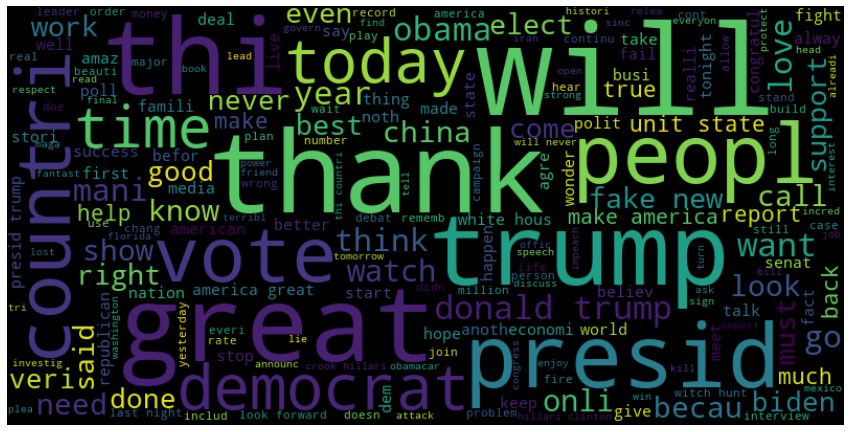

In [20]:
# visualize the frequent words.
# Plot the word cloud.
all_word = ' '.join([sentence for sentence in df['clean_text']])
word_cloud = WordCloud(width = 800, height = 400, random_state = 42, max_font_size = 120).generate(all_word)

# visualize the graph.
plt.figure(figsize=(15,10))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# Splitting the input

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

In [23]:
bow = bow_vectorizer.fit_transform(df['clean_text'])

In [24]:
bow[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 